In [1]:
import numpy as np; np.set_printoptions(suppress=True, linewidth=190); np.seterr(divide='ignore')
import pandas as pd; pd.set_option('display.width', 500)
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.stats import norm
from scipy.linalg import solve

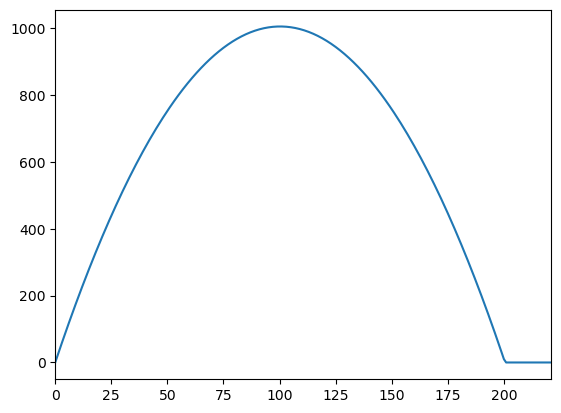

birth rate drops to 0 at NSS = 201


In [2]:
NSS = 200
C = 0.1
K = 0.05


def birth_rate(n):
    return n*max(0.0, K+(C*(NSS-n)))
def death_rate(n):
    return n*K

# plot birth rates over pop size
pop_range = np.arange(0, 100000)
birth_rates = np.array([birth_rate(pop) for pop in pop_range])
zero_births = np.where(birth_rates == 0)[0][1]

plt.plot(pop_range, birth_rates)
plt.xlim([0, zero_births*1.1])
plt.show()
print('birth rate drops to 0 at NSS =', zero_births)

# plt.plot(pop_range, np.array([birth_rate(pop)/(birth_rate(pop)+death_rate(pop)) for pop in pop_range]))
# plt.xlim([0, zero_births*1.1])
# plt.show()

In [3]:
# def p_n_t(n, t):
    
#     birth_p_values = np.array([birth_rate(NSS+i)/(birth_rate(NSS+i)+death_rate(NSS+i)) for i in range(n)])
#     print(birth_p_values)
#     mean_birth_p = np.average(birth_p_values, weights=np.linspace(1, 0, birth_p_values.size))
#     print(mean_birth_p)
#     expected_n_events = int(t*(birth_rate(NSS)+death_rate(NSS)))
    
#     mean = expected_n_events*((2*mean_birth_p)-1)
#     standard_deviation = np.sqrt(4*expected_n_events*mean_birth_p*(1-mean_birth_p))
    
#     return norm.pdf(n, mean, standard_deviation)

# x = 100
# p_n = p_n_t(x, T)
# print(p_n)
# if p_n < 1e-12:
#     print('yes')

In [4]:
T = 1000

init_state = NSS
state_start = 0
state_end = zero_births

state_range = 1+state_end-state_start
states = np.array([i for i in range(state_start, state_end+1)])

# get transition rate matrix Q
Q = np.zeros((state_range, state_range), dtype = np.float64)
for i in range(state_range):
    for j in range(state_range):
        # get rate, depending on birth or death or neither
        rate = 0
        if i+1 == j:
            rate = birth_rate(state_start+i)
        elif i-1 == j:
            rate = death_rate(state_start+i)
        Q[i,j] = rate

for i in range(state_range):
    Q[i, i] = -np.sum(Q[i,:])
Q[0, 0] = 0
        
print("\nTransition rate matrix:")
print(Q)

# get transition probability matrix P(t) 
P_t = expm(Q*T)
print("\nTransition probability matrix:")
print(P_t)

# inital distribution of states
N_0 = np.zeros(state_range)
N_0[init_state-state_start] = 1 # set the intial distribution to be all NSS

# distribution of states at time t
N_t = N_0 @ P_t
print(f"\nState distribution at time {T}:")
print(N_t)

# expected value at time t
E_N_t = np.average(states, weights=N_t)
print(f"\nExpected value at time {T}:")
print(round(E_N_t ,16))


Transition rate matrix:
[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.05 -20.    19.95 ...   0.     0.     0.  ]
 [  0.     0.1  -39.8  ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -39.8   29.85   0.  ]
 [  0.     0.     0.   ...  10.   -20.    10.  ]
 [  0.     0.     0.   ...   0.    10.05 -10.05]]

Transition probability matrix:
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.0025063  0.         0.         ... 0.13876121 0.41420222 0.41214151]
 [0.00000631 0.         0.         ... 0.13910898 0.41524032 0.41317444]
 ...
 [0.         0.         0.         ... 0.13910986 0.41524294 0.41317705]
 [0.         0.         0.         ... 0.13910986 0.41524294 0.41317705]
 [0.         0.         0.         ... 0.13910986 0.41524294 0.41317705]]

State distribution at time 1000:
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        

In [6]:
# inital distribution of states
N_0 = np.zeros(state_range)
N_0[init_state-state_start] = 1 # set the intial distribution to be all NSS

pop_size = NSS
time_steps = np.linspace(0, T+1, 100)
for t in time_steps:
    # get transition probability matrix P(t) 
    P_t = expm(Q*t)

    # distribution of states at time t
    N_t = N_0 @ P_t

    # expected value at time t
    E_N_t = np.average(states, weights=N_t)
    
    pop_size.append(E_N_t)
    print(f'Transition rate matrix calculation {round(((t)/T)*100, 2)}% complete     ', end = '\r')
    
plt.plot(time_steps, pop_size)

AttributeError: 'int' object has no attribute 'append'